In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
electronics_json_data = [json.loads(line) for line in (open("dataset/Electronics_5.json", "r"))]

In [3]:
electronics_data = pd.DataFrame(electronics_json_data)

In [4]:
electronics_data.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
electronics_data["overall"].value_counts()

5.0    1009026
4.0     347041
3.0     142257
1.0     108725
2.0      82139
Name: overall, dtype: int64

In [6]:
electronics_data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

<br><b>Here according to data description :</b>
<li>reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B</li>
<li>asin - ID of the product, e.g. 0000013714</li>
<li>reviewerName - name of the reviewer</li>
<li>helpful - helpfulness rating of the review, e.g. 2/3</li>
<li>reviewText - text of the review</li>
<li>overall - rating of the product</li>
<li>summary - summary of the review</li>
<li>unixReviewTime - time of the review (unix time)</li>
<li>reviewTime - time of the review (raw)</li>

In [7]:
electronics_data.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [8]:
electronics_data.shape

(1689188, 9)

In [9]:
electronics_data = electronics_data[0:100000]

In [10]:
electronics_data.shape

(100000, 9)




# Data Wrangling

#### <u>Adding helpful and not-helpful column</u>

In [11]:
#helpful col is in matrix it is better to seperate it into two columns
list_helpful_rev = []
list_not_helpful_rev = []

for h in electronics_data["helpful"]:
    list_helpful_rev.append(h[0])
    list_not_helpful_rev.append(h[1] - h[0])
    
#adding helpful review col, review that finds customers rev usefull
electronics_data["helpful_rev"] = list_helpful_rev
#adding not helpful review col, review that finds customers rev useless
electronics_data["not_helpful_rev"] = list_not_helpful_rev

#dropping helpful column
electronics_data = electronics_data.drop("helpful", axis = 1)

In [12]:
electronics_data.head(5)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",0,0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",12,3
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",43,2
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",9,1
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",0,0


#### <u>Adding rating_class column</u>

In [13]:
#now overall rating has 5 unique values (1,2,3,4,5) lets classify it as good rating and bad rating

threshold = 3

electronics_data["rating_class"] = electronics_data["overall"].apply(lambda x: "good" if x > 3 else "bad")
    

In [14]:
electronics_data.sample(5)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class
11993,A82F83197HNMJ,B00004XRD3,"DougMac ""Doug""",I have an Athlon 800 on an Asus MB home built ...,5.0,Easy to Install and Priced Right,1025222400,"06 28, 2002",3,0,good
5727,A1W476YCP7DZ2S,B00002EQCW,BillH,A nice looking product in a metal case. I plu...,5.0,Good looking five port switch,1390435200,"01 23, 2014",0,0,good
72829,A27VTWM8LQ2L5S,B0000A2QBP,"Crash "";)""","This audio cable works great, dont like the de...",5.0,Does the job,1347321600,"09 11, 2012",0,1,good
55103,AGGIG4GSY7HAB,B000086EYG,JT,Just what I needed for my CD burner. I was tir...,5.0,Happy purchaser,1373068800,"07 6, 2013",0,0,good
73716,AIBROA3R4LMJQ,B0000AE6G9,Art Driggers,I need to view some old slides before cleaning...,5.0,It's an inexpensive viewer,1356220800,"12 23, 2012",0,0,good


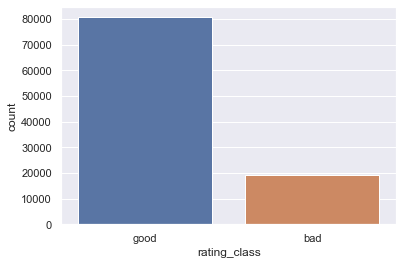

good    80692
bad     19308
Name: rating_class, dtype: int64


In [15]:
#calculating total number of good and bad ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(x = "rating_class", data = electronics_data)
plt.show()

val = electronics_data["rating_class"].value_counts()
print(val)

In [16]:
print("{:.2f}% more percentage of good rev than bad reviews.".format( ((val[0] - val[1]) / (val[1]+val[0])) * 100 ))

61.38% more percentage of good rev than bad reviews.


#### <u>Adding helpful review ratio for each user</u>

In [17]:
##adding col helpful_rev_ratio
electronics_data["helpful_rev_ratio"] = electronics_data["helpful_rev"] / (electronics_data["helpful_rev"] + electronics_data["not_helpful_rev"])

In [18]:
electronics_data.sample(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
46269,A3Q5LE9PAMR36W,B00006RH5I,Michael B. Mcnelly,The first lens out of plastic bag can not be u...,1.0,Junk Dirty can not be used,1303776000,"04 26, 2011",3,22,bad,0.12
73333,A1U5WAWSCQLKEW,B0000AB4PP,"Pulpit Pounding Political Pundit ""Peppy""",I dropped a Nikon n90s four feet onto hard pav...,5.0,It's easy to underestimate how protective thes...,1286668800,"10 10, 2010",2,0,good,1.00


In [19]:
electronics_data["helpful_rev_ratio"].fillna(0, inplace = True)

In [20]:
electronics_data.head(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",0,0,good,0.0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",12,3,bad,0.8


In [21]:
#dropping columns reviewerName, unixReviewTime
electronics_data = electronics_data.drop(["reviewerName", "unixReviewTime"], axis = 1)

In [22]:
#Converting time in yyyy-mm-dd
electronics_data["reviewTime"] = pd.to_datetime(electronics_data["reviewTime"])

In [23]:
electronics_data.head(2)

,reviewerID,asin,reviewText,overall,summary,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
0,AO94DHGC771SJ,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,2013-06-02,0,0,good,0.0
1,AMO214LNFCEI4,0528881469,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,2010-11-25,12,3,bad,0.8


In [24]:
electronics_data = electronics_data.rename(columns = {"overall":"rating"})

In [25]:
electronics_data[["helpful_rev", "not_helpful_rev", "rating", "helpful_rev_ratio"]].describe()

,helpful_rev,not_helpful_rev,rating,helpful_rev_ratio
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.741470,0.752350,4.231190,0.424903
std,23.275162,3.144506,1.187011,0.460308
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,5.000000,0.000000
75%,3.000000,0.000000,5.000000,1.000000
max,1977.000000,227.000000,5.000000,1.000000


# Visualizing Data

#### <u>Number of Reviews over the year</u>

In [26]:
#creating additional column of month and year of review
electronics_data["rev_year"] = electronics_data["reviewTime"].dt.year
electronics_data["rev_month"] = electronics_data["reviewTime"].dt.month

In [27]:
#grouping review w.r.t year and taking count of reviewID
Yearly = electronics_data.groupby("rev_year")["reviewerID"].count().reset_index()
Yearly = Yearly.rename(columns = {"reviewerID":"Number_Of_Reviews"})
Yearly.head(5)

,rev_year,Number_Of_Reviews
0,1999,72
1,2000,817
2,2001,1609
3,2002,2315
4,2003,3546


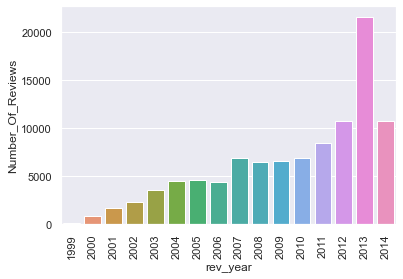

In [28]:
ax = sns.barplot(x = "rev_year", y = "Number_Of_Reviews", data = Yearly)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

We see that year 2013 has maximum number of reviews.


#### <u>Number Of Reviews By Month</u>

In [29]:
Monthly = electronics_data.groupby("rev_month")["reviewerID"].count().reset_index()
Monthly = Monthly.rename(columns = {"reviewerID":"Number_Of_Reviews"})
Monthly.head(2)

,rev_month,Number_Of_Reviews
0,1,11227
1,2,8998


In [30]:
import calendar
Monthly["rev_month"] = Monthly["rev_month"].apply(lambda x : calendar.month_abbr[x])
Monthly

,rev_month,Number_Of_Reviews
0,Jan,11227
1,Feb,8998
2,Mar,9570
3,Apr,8150
4,May,8014
5,Jun,7838
6,Jul,7717
7,Aug,6956
8,Sep,6476
9,Oct,6730


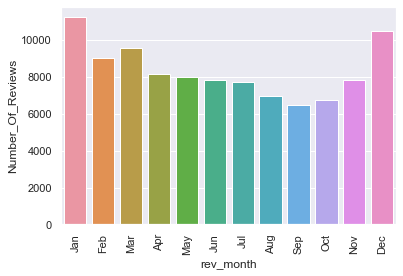

In [31]:
ax = sns.barplot(x = "rev_month", y = "Number_Of_Reviews", data = Monthly)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

#### <u>Average overall rating over years</u>

In [32]:
Yearly_avg_rating = electronics_data.groupby("rev_year")["rating"].mean().reset_index()
Yearly_avg_rating = Yearly_avg_rating.rename(columns = {"rating":"avg_rating"})

In [33]:
Yearly_avg_rating.head(3)

,rev_year,avg_rating
0,1999,4.388889
1,2000,4.321909
2,2001,4.187694


<AxesSubplot:xlabel='rev_year', ylabel='avg_rating'>

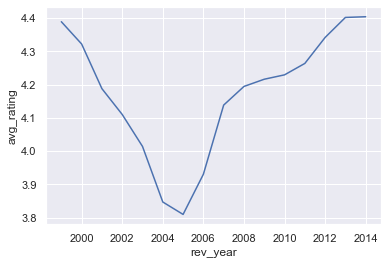

In [34]:
sns.lineplot(x = "rev_year", y = "avg_rating", data = Yearly_avg_rating)

#### <u>Average Rating V/S Average Helpfullness Rating by the User</u>

In [35]:
user_rating_stats = electronics_data[["reviewerID", "helpful_rev", "not_helpful_rev", "rating"]]

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
user_rating_stats["total_rev_given"] = user_rating_stats["helpful_rev"] + user_rating_stats["not_helpful_rev"]
user_rating_stats["percentage_helpful"] = (user_rating_stats["helpful_rev"]/(user_rating_stats["helpful_rev"] + user_rating_stats["not_helpful_rev"] ))*100
user_rating_stats["avg_rating_given"] = user_rating_stats.groupby("reviewerID")["rating"].mean()

In [38]:
user_rating_stats.sample()

,reviewerID,helpful_rev,not_helpful_rev,rating,total_rev_given,percentage_helpful,avg_rating_given
79135,A2MBR3KL7YQVG1,15,0,2.0,15,100.0,NaN


In [39]:
user_rating_stats = user_rating_stats.drop(["helpful_rev", "not_helpful_rev", "rating"], axis = 1)

In [40]:

user_rating_stats["percentage_helpful"].fillna(0, inplace = True)
user_rating_stats["avg_rating_given"].fillna(0, inplace = True)

In [41]:
user_rating_stats["helpful_rev_given"] = electronics_data["helpful_rev"]

In [42]:
user_rating_stats[["reviewerID", "avg_rating_given", "total_rev_given", "helpful_rev_given", "percentage_helpful"]].sample(5)

,reviewerID,avg_rating_given,total_rev_given,helpful_rev_given,percentage_helpful
38876,AG104HP7ZQX5A,0.0,0,0,0.000000
43437,A2NC8IOZRFTW91,0.0,0,0,0.000000
20967,A3VVARA7BW5U3L,0.0,1,1,100.000000
50562,A32E0D8WI1IN87,0.0,0,0,0.000000
84659,A2FDTW5CMY8SZC,0.0,11,1,9.090909


<AxesSubplot:xlabel='total_rev_given', ylabel='percentage_helpful'>

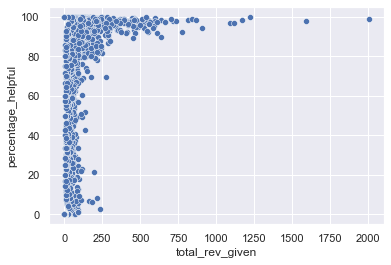

In [43]:
sns.scatterplot(x = "total_rev_given", y = "percentage_helpful", data = user_rating_stats)


#### <u>Length of Review V/S Rating Given</u>

In [44]:
cmp_review_text_rating = electronics_data[["reviewText", "rating_class"]]

In [45]:
cmp_review_text_rating["reviewText_length"] = cmp_review_text_rating["reviewText"].apply(lambda x : len(x))

In [46]:
cmp_review_text_rating.head(5)

,reviewText,rating_class,reviewText_length
0,We got this GPS for my husband who is an (OTR)...,good,805
1,"I'm a professional OTR truck driver, and I bou...",bad,2175
2,"Well, what can I say. I've had this unit in m...",bad,4607
3,"Not going to write a long review, even thought...",bad,2246
4,I've had mine for a year and here's what we go...,bad,1076


<AxesSubplot:xlabel='rating_class', ylabel='reviewText_length'>

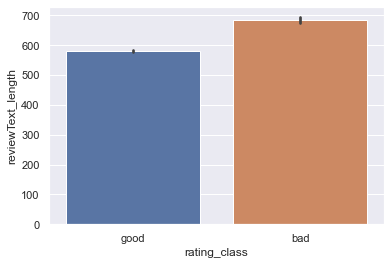

In [47]:
sns.barplot(x = "rating_class", y = "reviewText_length", data = cmp_review_text_rating )

In [48]:
electronics_data.to_csv("electronics_data_2.csv", sep=',', encoding='utf-8', index = False)